<p align="center">
    <strong style="font-size: 25px;">Object Detection using YOLOv11</strong>
</p>

<br>

<p align="center">
    <span style="font-size: 16.5px; font-weight: normal;">Mohammad Soroush Esnaashari</span>
</p>

<p align="center">
  <a href="https://soroushesnaashari.github.io" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="Website"
         src="https://img.shields.io/badge/-Website-2d2d2d?style=flat-square&logo=githubpages&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://www.linkedin.com/in/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="LinkedIn"
         src="https://custom-icon-badges.demolab.com/badge/-LinkedIn-2d2d2d?style=flat-square&logo=linkedin-white&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://x.com/srshesn" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="X"
         src="https://img.shields.io/badge/-Twitter-2d2d2d?style=flat-square&logo=X&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://github.com/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="GitHub"
         src="https://img.shields.io/badge/-GitHub-2d2d2d?style=flat-square&logo=github&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://www.kaggle.com/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="Kaggle"
         src="https://img.shields.io/badge/-Kaggle-2d2d2d?style=flat-square&logo=kaggle&logoColor=white"
         style="vertical-align:middle;">
  </a>
</p>

## <span style="color: #999999">1 | </span><span style="color: #000">Libraries</span>

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3

In [2]:
import os
import cv2
import random
import pandas as pd
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## <span style="color: #999999">2 | </span><span style="color: #000">Pathes</span>

In [3]:
DATASET_DIR = '/kaggle/input/vehicledetection/VehiclesDetectionDataset'
TRAIN_IMAGES = f'{DATASET_DIR}/train/images'
VALID_IMAGES = f'{DATASET_DIR}/valid/images'
TEST_IMAGES  = f'{DATASET_DIR}/test/images'
DATA_YAML    = f'{DATASET_DIR}/dataset.yaml'
VIDEO_PATH   = '/kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4'

## <span style="color: #999999">3 | </span><span style="color: #000">Visualize Sample Images</span>

In [4]:
def show_samples(image_dir, title, n=6, cols=3, figsize=(12,8)):
    """
    Display random sample images from a directory
    """
    image_paths = list(Path(image_dir).glob('*.jpg'))
    samples = random.sample(image_paths, min(n, len(image_paths)))
    rows = (len(samples) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, path in enumerate(samples):
        img = cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

### <span style="color: #999999">3.1 | </span><span style="color: #707070">Run visualization</span>

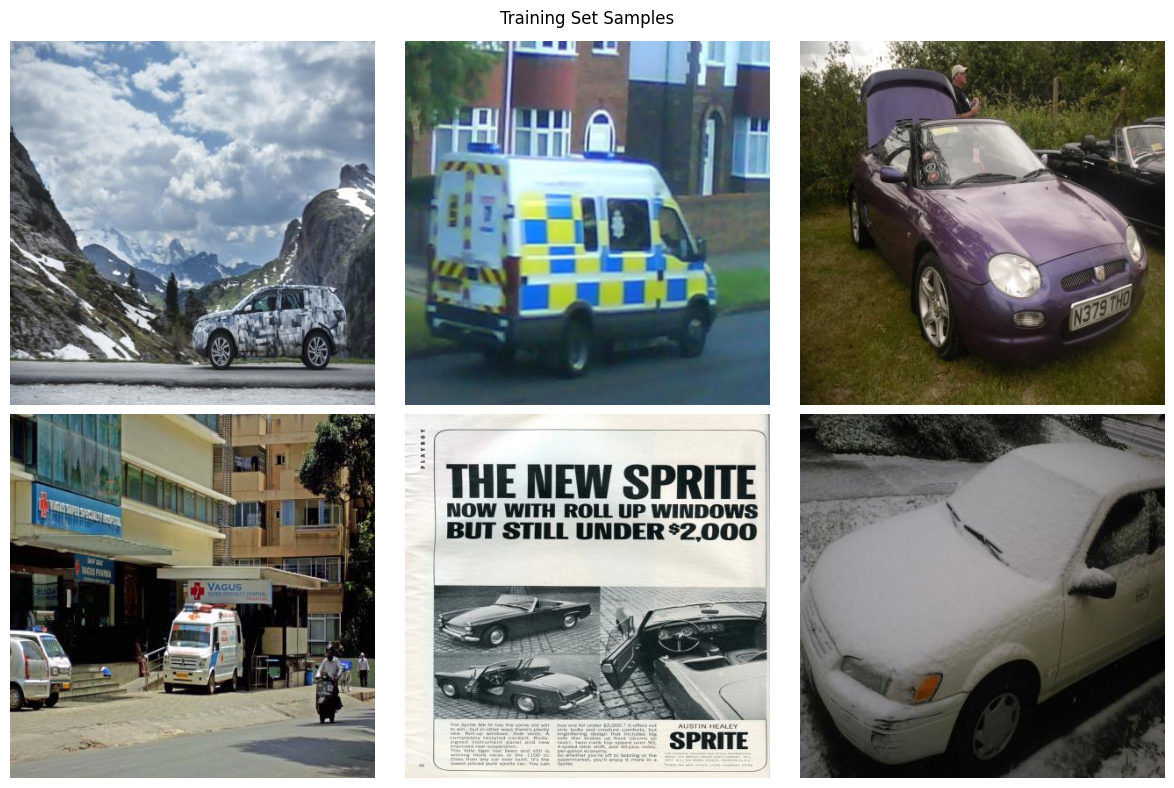

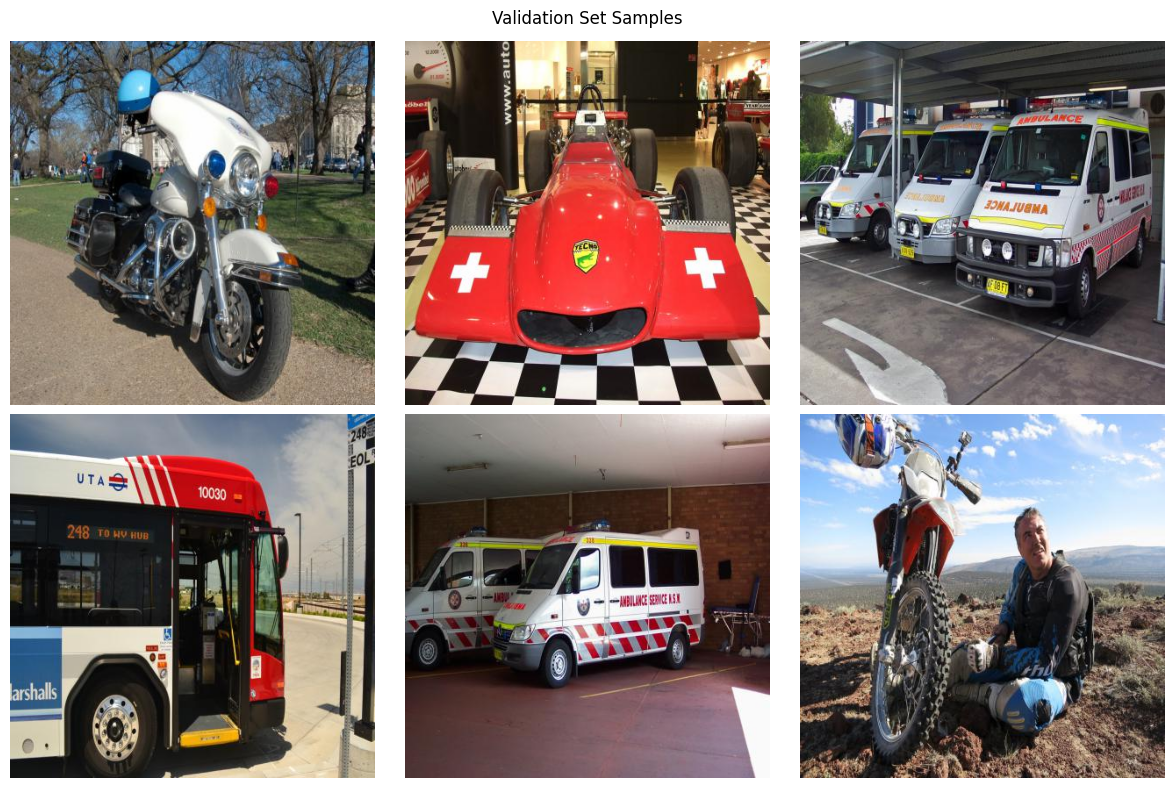

In [5]:
show_samples(TRAIN_IMAGES, 'Training Set Samples')
show_samples(VALID_IMAGES, 'Validation Set Samples')

## <span style="color: #999999">4 | </span><span style="color: #000">Train YOLOv11</span>

In [6]:
model = YOLO('yolo11n')  

training_results = model.train(
    data=DATA_YAML,
    imgsz=640,
    batch=16,
    epochs=100,
    project='runs/train',
    name='yolov11_vehicle',
    exist_ok=True
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 89.5MB/s]


Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/vehicledetection/VehiclesDetectionDataset/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_vehicle, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

100%|██████████| 755k/755k [00:00<00:00, 27.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/vehicledetection/VehiclesDetectionDataset/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:03<00:00, 257.41it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/vehicledetection/VehiclesDetectionDataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 8.5±1.1 MB/s, size: 33.0 KB)


val: Scanning /kaggle/input/vehicledetection/VehiclesDetectionDataset/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 253.17it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/vehicledetection/VehiclesDetectionDataset/valid is not writeable, cache not saved.


Plotting labels to runs/train/yolov11_vehicle/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov11_vehicle
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.22G      1.054      3.171      1.389         39        640: 100%|██████████| 55/55 [00:11<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.88it/s]

                   all        250        454     0.0101      0.861      0.224      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.62G      1.195      2.504      1.477         47        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.57it/s]


                   all        250        454      0.355      0.104      0.106     0.0463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.64G      1.224       2.33      1.503         63        640: 100%|██████████| 55/55 [00:08<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]


                   all        250        454      0.321      0.317      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.65G       1.24      2.226      1.497         46        640: 100%|██████████| 55/55 [00:08<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]


                   all        250        454      0.556      0.142      0.124     0.0713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.67G      1.231      2.141      1.496         49        640: 100%|██████████| 55/55 [00:09<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.48it/s]


                   all        250        454      0.272      0.258      0.198     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.68G      1.236       2.08      1.507         39        640: 100%|██████████| 55/55 [00:09<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]

                   all        250        454      0.209      0.361      0.207      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.7G      1.209      2.006      1.474         60        640: 100%|██████████| 55/55 [00:09<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.71it/s]


                   all        250        454      0.417      0.304      0.295      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.71G      1.207      1.904      1.481         45        640: 100%|██████████| 55/55 [00:09<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]


                   all        250        454      0.365       0.33      0.313      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.72G      1.166      1.816      1.446         45        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        250        454      0.393      0.442      0.349       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.74G      1.162      1.758      1.451         64        640: 100%|██████████| 55/55 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.45it/s]

                   all        250        454       0.47      0.364      0.397      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.75G      1.135      1.703      1.413         54        640: 100%|██████████| 55/55 [00:09<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]


                   all        250        454      0.734       0.34      0.422      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.77G      1.129      1.595      1.407         39        640: 100%|██████████| 55/55 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]


                   all        250        454      0.617      0.406      0.358      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.78G      1.114       1.56      1.398         50        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.62it/s]


                   all        250        454       0.67      0.346      0.365      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.8G      1.075      1.534      1.376         65        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        250        454      0.509        0.5      0.502      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.81G      1.072      1.522      1.382         71        640: 100%|██████████| 55/55 [00:09<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.84it/s]


                   all        250        454      0.569      0.461      0.457      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.83G      1.074      1.487       1.38         64        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.86it/s]


                   all        250        454       0.58      0.437      0.453      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.84G      1.038      1.389      1.363         62        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]


                   all        250        454      0.473      0.455      0.413      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.86G      1.042      1.419      1.352         64        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        250        454      0.566       0.39      0.425      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.87G      1.042      1.327      1.328         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        250        454      0.541      0.451      0.481      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.89G      1.009        1.3      1.323         38        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.528      0.508      0.491      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.9G     0.9991      1.264      1.317         50        640: 100%|██████████| 55/55 [00:09<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        250        454      0.568      0.466      0.472      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.92G      1.002      1.228      1.331         42        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        250        454      0.576       0.53      0.541      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.93G     0.9735      1.244      1.302         41        640: 100%|██████████| 55/55 [00:09<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        250        454      0.565      0.495      0.542      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.95G     0.9755      1.189      1.283         52        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        250        454      0.598      0.492      0.516       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.96G     0.9795       1.19      1.305         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        250        454      0.556      0.533       0.56      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.98G      0.945      1.103      1.277         53        640: 100%|██████████| 55/55 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        250        454      0.525      0.645      0.522      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.99G     0.9528       1.14      1.278         41        640: 100%|██████████| 55/55 [00:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        250        454      0.591      0.492      0.531      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.01G     0.9442      1.113      1.277         64        640: 100%|██████████| 55/55 [00:09<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.02it/s]

                   all        250        454      0.537      0.544      0.503      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.02G     0.9438      1.095      1.281         59        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        250        454      0.607      0.499      0.537       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.04G     0.9064      1.071      1.261         39        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.33it/s]

                   all        250        454      0.584      0.606      0.573      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.05G     0.8997      1.044      1.235         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        250        454      0.621      0.507       0.56      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.06G     0.8912      1.027      1.234         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        250        454      0.588      0.501        0.5      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.08G     0.8891      1.002      1.236         62        640: 100%|██████████| 55/55 [00:09<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]


                   all        250        454      0.675      0.465      0.552      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.1G     0.8837      1.003      1.237         49        640: 100%|██████████| 55/55 [00:09<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        250        454      0.619      0.464      0.533      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.11G     0.8873      1.015      1.241         43        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

                   all        250        454      0.715      0.464      0.542      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.12G     0.8834     0.9765      1.229         48        640: 100%|██████████| 55/55 [00:09<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        250        454      0.644      0.527      0.576      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.14G     0.8616     0.9548      1.223         37        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]


                   all        250        454      0.792      0.411      0.527      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.15G     0.8246     0.8923      1.189         42        640: 100%|██████████| 55/55 [00:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.701      0.458      0.539       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.17G     0.8484     0.9118      1.224         44        640: 100%|██████████| 55/55 [00:09<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.552      0.538      0.524      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.18G     0.8512      0.904      1.206         54        640: 100%|██████████| 55/55 [00:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.653      0.537      0.534      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.2G     0.8657     0.8938      1.214         38        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        250        454      0.565      0.551      0.567      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.21G     0.8107     0.8773       1.18         46        640: 100%|██████████| 55/55 [00:09<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        250        454      0.678      0.545      0.605      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.23G     0.8019     0.8553       1.18         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        250        454      0.771      0.449      0.565      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.24G     0.7909     0.8343      1.163         39        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        250        454      0.547      0.526      0.506      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.26G     0.8145     0.8611      1.196         49        640: 100%|██████████| 55/55 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.648      0.532      0.565      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.27G     0.7859     0.8299      1.166         46        640: 100%|██████████| 55/55 [00:09<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.01it/s]

                   all        250        454      0.638      0.434      0.528      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.29G     0.7803     0.7995      1.165         60        640: 100%|██████████| 55/55 [00:09<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.53it/s]


                   all        250        454      0.669       0.54      0.578      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.3G     0.8058     0.8322      1.186         43        640: 100%|██████████| 55/55 [00:09<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.64it/s]

                   all        250        454      0.599      0.527      0.543      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.32G     0.7692     0.7924      1.162         57        640: 100%|██████████| 55/55 [00:09<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.74it/s]

                   all        250        454      0.722      0.518      0.584      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.33G     0.7793     0.7846      1.158         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.69it/s]

                   all        250        454       0.71      0.517      0.567      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.35G     0.7896     0.8094       1.17         50        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454      0.592      0.488      0.509      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.36G     0.7731     0.7643      1.153         56        640: 100%|██████████| 55/55 [00:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454       0.52      0.561      0.539      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.38G     0.7276     0.7322      1.118         52        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454      0.747      0.496      0.553      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.39G     0.7471     0.7425      1.135         73        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        250        454      0.701      0.556      0.611      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.41G     0.7401     0.7233      1.134         43        640: 100%|██████████| 55/55 [00:09<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.00it/s]

                   all        250        454      0.656      0.514      0.567       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.42G     0.7226     0.7191      1.121         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        250        454      0.654      0.503      0.584      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.44G     0.7189     0.7094      1.118         59        640: 100%|██████████| 55/55 [00:09<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]

                   all        250        454      0.706      0.541      0.582      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.45G      0.714     0.6884      1.109         64        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all        250        454      0.652      0.474      0.555      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.46G     0.7062     0.6801      1.117         65        640: 100%|██████████| 55/55 [00:09<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        250        454      0.648      0.489      0.566      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.48G     0.6965     0.6845      1.108         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.92it/s]

                   all        250        454      0.613      0.511      0.568      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.49G     0.7031     0.6866      1.118         50        640: 100%|██████████| 55/55 [00:09<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        250        454      0.725      0.533      0.599      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.51G      0.698     0.6854      1.105         50        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]


                   all        250        454      0.737      0.503      0.595      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.52G     0.6903     0.6434      1.082         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

                   all        250        454      0.734      0.547      0.615      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.54G     0.6853      0.653      1.083         58        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        250        454      0.611      0.545      0.565       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.55G     0.6807     0.6461      1.098         53        640: 100%|██████████| 55/55 [00:09<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        250        454      0.654      0.561      0.601      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.57G     0.6724     0.6363      1.098         40        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all        250        454      0.701      0.533      0.575      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.58G     0.6904     0.6592       1.09         38        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


                   all        250        454      0.563      0.609      0.591      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.6G     0.6436     0.6072       1.07         42        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        250        454        0.6      0.589      0.591      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.61G     0.6341     0.6042      1.068         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        250        454      0.541       0.58      0.545      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.63G     0.6501      0.612       1.08         40        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        250        454      0.666      0.541      0.574      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.64G     0.6391     0.5991      1.072         24        640: 100%|██████████| 55/55 [00:09<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.66it/s]

                   all        250        454      0.715      0.527      0.604       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.66G     0.6462     0.6118      1.069         57        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all        250        454      0.589      0.601      0.575      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.67G     0.6209     0.5861       1.06         56        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.613      0.599      0.599       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.69G     0.6118     0.5656      1.045         33        640: 100%|██████████| 55/55 [00:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454      0.684      0.529      0.598      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.7G     0.6208     0.5831      1.056         43        640: 100%|██████████| 55/55 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.03it/s]

                   all        250        454      0.617      0.571      0.579      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.72G     0.6393     0.5794      1.068         56        640: 100%|██████████| 55/55 [00:09<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        250        454      0.723      0.527      0.586       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.73G     0.5988     0.5567       1.05         40        640: 100%|██████████| 55/55 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.08it/s]

                   all        250        454      0.617      0.544      0.602      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.75G     0.5975     0.5521      1.047         49        640: 100%|██████████| 55/55 [00:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        250        454      0.576        0.6      0.602      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.76G     0.6101     0.5415      1.048         54        640: 100%|██████████| 55/55 [00:09<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]

                   all        250        454      0.704      0.545      0.595      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.78G     0.5924     0.5596      1.046         63        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454      0.653      0.564       0.58      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.79G     0.5853     0.5385      1.039         73        640: 100%|██████████| 55/55 [00:09<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        250        454      0.635      0.526      0.594      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.81G      0.579     0.5406      1.041         49        640: 100%|██████████| 55/55 [00:09<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.87it/s]

                   all        250        454      0.684      0.561      0.603      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.82G     0.5773     0.5337      1.033         61        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        250        454       0.76      0.531      0.616      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.84G     0.5742      0.506      1.025         48        640: 100%|██████████| 55/55 [00:09<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        250        454      0.683      0.543      0.593      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.85G     0.5671     0.5133      1.031         61        640: 100%|██████████| 55/55 [00:09<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.11it/s]

                   all        250        454      0.723       0.53      0.602      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.87G     0.5553     0.5017       1.02         51        640: 100%|██████████| 55/55 [00:09<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        250        454       0.67      0.533      0.597      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.88G     0.5774     0.5275      1.033         34        640: 100%|██████████| 55/55 [00:09<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        250        454      0.649      0.572      0.611      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.89G     0.5632     0.5074      1.026         66        640: 100%|██████████| 55/55 [00:09<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]


                   all        250        454      0.683      0.585      0.629      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.91G     0.5625     0.5047      1.029         53        640: 100%|██████████| 55/55 [00:09<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.13it/s]

                   all        250        454      0.694      0.596      0.633      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.92G     0.5454     0.4948      1.014         59        640: 100%|██████████| 55/55 [00:09<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.60it/s]

                   all        250        454      0.637      0.635      0.627      0.471


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.94G      0.491     0.4097     0.9537         26        640: 100%|██████████| 55/55 [00:09<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        250        454      0.678       0.56      0.612      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.96G     0.4793     0.3825     0.9626         20        640: 100%|██████████| 55/55 [00:09<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        250        454       0.65      0.602      0.614      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.97G     0.4688     0.3759     0.9554         26        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.94it/s]

                   all        250        454      0.686      0.584      0.634      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.98G     0.4624     0.3746      0.955         26        640: 100%|██████████| 55/55 [00:09<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        250        454      0.639      0.627      0.616      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         4G     0.4521     0.3573     0.9472         23        640: 100%|██████████| 55/55 [00:09<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        250        454      0.725      0.573      0.616      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.01G     0.4447     0.3444     0.9401         23        640: 100%|██████████| 55/55 [00:09<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.17it/s]

                   all        250        454      0.743      0.569      0.631      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.03G     0.4385     0.3396      0.938         20        640: 100%|██████████| 55/55 [00:09<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all        250        454      0.722      0.585      0.629      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.04G      0.437     0.3463     0.9381         28        640: 100%|██████████| 55/55 [00:09<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.05it/s]

                   all        250        454       0.71       0.58      0.624      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.06G     0.4218      0.334      0.922         20        640: 100%|██████████| 55/55 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        250        454      0.689      0.604      0.631      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.07G      0.438     0.3556     0.9437         21        640: 100%|██████████| 55/55 [00:09<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]

                   all        250        454      0.656      0.609      0.636      0.485



100 epochs completed in 0.313 hours.
Optimizer stripped from runs/train/yolov11_vehicle/weights/last.pt, 5.5MB
Optimizer stripped from runs/train/yolov11_vehicle/weights/best.pt, 5.5MB

Validating runs/train/yolov11_vehicle/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        250        454      0.656      0.609      0.636      0.485
             Ambulance         50         64      0.809      0.844      0.871      0.728
                   Bus         30         46      0.673      0.739       0.81      0.662
                   Car         90        238      0.625      0.496      0.527      0.365
            Motorcycle         42         46       0.58      0.565      0.573      0.394
                 Truck         38         60      0.594        0.4        0.4      0.278
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/train/yolov11_vehicle


## <span style="color: #999999">5 | </span><span style="color: #000">Plot Training Metrics</span>

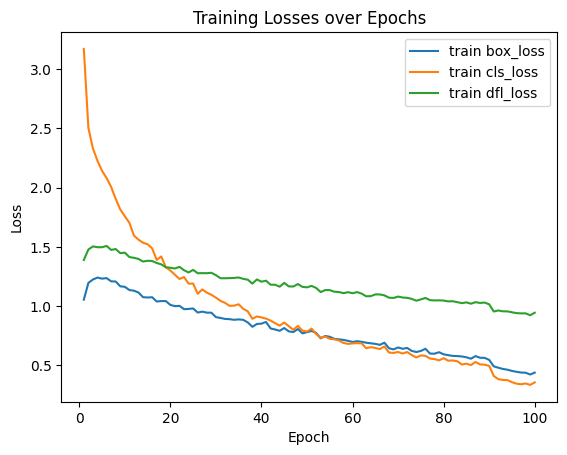

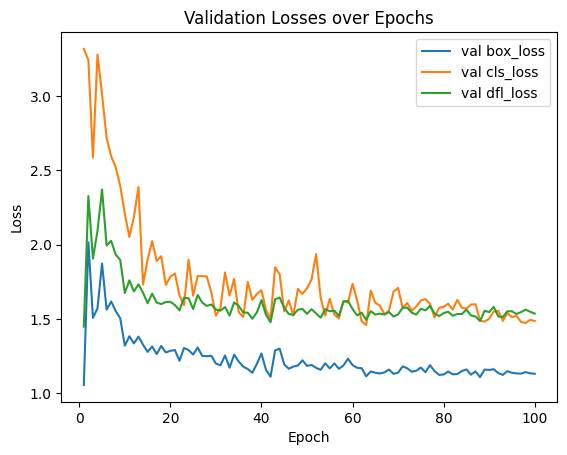

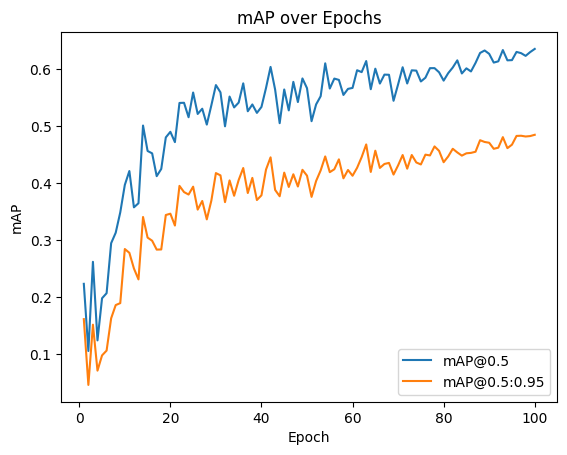

In [7]:
from pathlib import Path

def plot_results(run_dir):
    f = Path(run_dir) / 'results.csv'
    if not f.exists():
        raise FileNotFoundError(f"No results.csv in {run_dir}")
    df = pd.read_csv(f)

    epochs = df['epoch']

    # 1) Training losses
    plt.figure()
    plt.plot(epochs, df['train/box_loss'], label='train box_loss')
    plt.plot(epochs, df['train/cls_loss'], label='train cls_loss')
    plt.plot(epochs, df['train/dfl_loss'], label='train dfl_loss')
    plt.title('Training Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 2) Validation losses
    plt.figure()
    plt.plot(epochs, df['val/box_loss'], label='val box_loss')
    plt.plot(epochs, df['val/cls_loss'], label='val cls_loss')
    plt.plot(epochs, df['val/dfl_loss'], label='val dfl_loss')
    plt.title('Validation Losses over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 3) mAP curves
    plt.figure()
    plt.plot(epochs, df['metrics/mAP50(B)'],      label='mAP@0.5')
    plt.plot(epochs, df['metrics/mAP50-95(B)'],   label='mAP@0.5:0.95')
    plt.title('mAP over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('mAP')
    plt.legend()
    plt.show()

plot_results('runs/train/yolov11_vehicle')

## <span style="color: #999999">6 | </span><span style="color: #000">Evaluate on Test Set</span>

In [8]:
test_results = model.predict(
    source=TEST_IMAGES,
    imgsz=640,
    batch=16,
    save=True,
    project='runs/test',
    name='yolov11_vehicle'
)


image 1/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 640x640 1 Ambulance, 4.6ms
image 2/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg: 640x640 1 Ambulance, 4.6ms
image 3/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg: 640x640 3 Buss, 4.6ms
image 4/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg: 640x640 3 Buss, 4.6ms
image 5/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg: 640x640 2 Buss, 4.6ms
image 6/126 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg: 640x640 2 Buss, 4.6ms
image 7/126 /kaggle/input/vehicledetectio

### <span style="color: #999999">6.1 | </span><span style="color: #707070">Show some predictions</span>

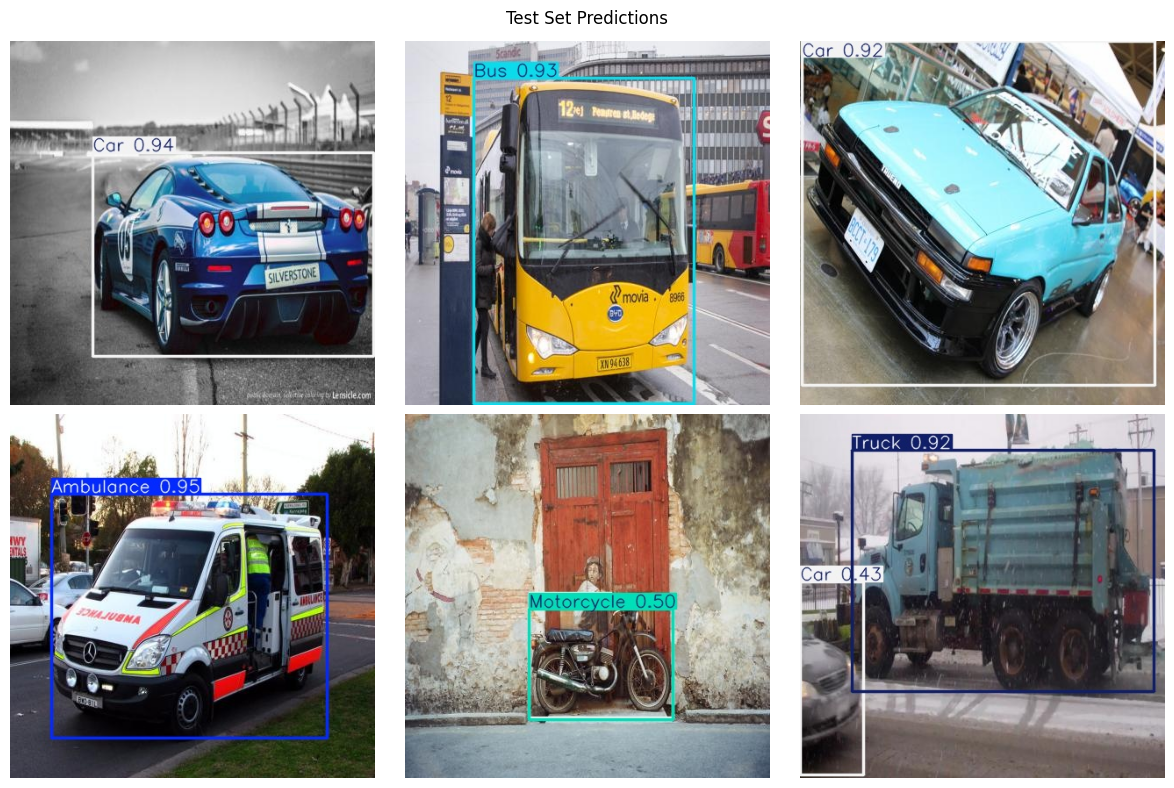

In [9]:
PRED_DIR = 'runs/test/yolov11_vehicle'
show_samples(PRED_DIR, 'Test Set Predictions')

## <span style="color: #999999">6 | </span><span style="color: #000">Inference on Video</span>

In [10]:
video_output = 'runs/video/yolov11_vehicle'
os.makedirs(video_output, exist_ok=True)
_ = model.predict(
    source=VIDEO_PATH,
    show=False,
    save=True,
    project='runs/video',
    name='yolov11_vehicle'
)
print(f"Video results saved to {video_output}")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2362) /kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4: 384x640 6 Cars, 45.0ms
video 1/1 (frame 2/2362) /kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4: 384x640 7 Cars, 8.8ms
video 1/1 (frame 3/2362) /kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4: 384x640 7 Cars, 8.3ms
video 1/1 (frame 4/2362) /kaggle/input/vehicledetection/TestVideo/TrafficPolice.mp4: 384x640 5 Cars, 10.6ms
video 1/1 (frame 5/2362) /

<p align="center">
    <strong style="font-size: 25px;">The End!</strong>
</p>

<br>

<p align="center">
    <span style="font-size: 16.5px; font-weight: normal;">Mohammad Soroush Esnaashari</span>
</p>

<p align="center">
  <a href="https://soroushesnaashari.github.io" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="Website"
         src="https://img.shields.io/badge/-Website-2d2d2d?style=flat-square&logo=githubpages&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://www.linkedin.com/in/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="LinkedIn"
         src="https://custom-icon-badges.demolab.com/badge/-LinkedIn-2d2d2d?style=flat-square&logo=linkedin-white&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://x.com/srshesn" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="X"
         src="https://img.shields.io/badge/-Twitter-2d2d2d?style=flat-square&logo=X&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://github.com/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="GitHub"
         src="https://img.shields.io/badge/-GitHub-2d2d2d?style=flat-square&logo=github&logoColor=white"
         style="vertical-align:middle;">
  </a>
  <a href="https://www.kaggle.com/soroushesnaashari" target="_blank" style="display:inline-block; margin:0 4px;">
    <img alt="Kaggle"
         src="https://img.shields.io/badge/-Kaggle-2d2d2d?style=flat-square&logo=kaggle&logoColor=white"
         style="vertical-align:middle;">
  </a>
</p>